<a href="https://colab.research.google.com/github/iqbalhanif/Spatial-Machine-Learning/blob/main/Accident_Clustering_%26_Grouping_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# !pip install folium

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import folium

# 1. Data Understanding

Yang perlu dilihat :
- Besar dataframe
- Jenis2 pada kolom dataframe
- Missing Value pada kolom

In [4]:
# load data
df_acc = pd.read_csv('/content/gdrive/MyDrive/Spatial Machine Learning Python/accidents_2005_to_2007.csv', sep =',')
df_acc.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,NaN,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,NaN,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


In [5]:
#statistika deskriptif
df_acc.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Junction_Detail,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,569910.000000,5.699100e+05,569910.000000,569910.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,570011.000000,0.0,570011.000000,570011.000000,570011.000000,570011.000000
mean,435609.680423,3.017252e+05,-1.494988,52.603655,31.205219,2.839647,1.840773,1.363484,4.124371,358.870490,4.107094,1001.977992,39.788329,NaN,2.588634,379.357298,1.367330,2005.970843
std,95639.717128,1.613470e+05,1.406187,1.452752,25.516761,0.405771,0.722930,0.823950,1.932537,258.233842,1.446774,1832.143128,14.474087,NaN,3.221140,1306.844752,0.482558,0.816882
min,64980.000000,1.052000e+04,-7.515933,49.914513,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,10.000000,NaN,-1.000000,-1.000000,1.000000,2005.000000
25%,371020.000000,1.787400e+05,-2.434639,51.494892,7.000000,3.000000,1.000000,1.000000,2.000000,126.000000,3.000000,0.000000,30.000000,NaN,-1.000000,0.000000,1.000000,2005.000000
50%,435490.000000,2.773850e+05,-1.470388,52.388312,31.000000,3.000000,2.000000,1.000000,4.000000,340.000000,4.000000,112.000000,30.000000,NaN,3.000000,0.000000,1.000000,2006.000000
75%,519230.000000,3.982800e+05,-0.267764,53.480015,46.000000,3.000000,2.000000,1.000000,6.000000,536.000000,6.000000,694.000000,60.000000,NaN,6.000000,0.000000,2.000000,2007.000000
max,655290.000000,1.208800e+06,1.758337,60.757544,98.000000,3.000000,28.000000,68.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,NaN,6.000000,9999.000000,3.000000,2007.000000


In [6]:
# cek kolom dan tipe data
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               570011 non-null  object 
 1   Location_Easting_OSGR                        569910 non-null  float64
 2   Location_Northing_OSGR                       569910 non-null  float64
 3   Longitude                                    569910 non-null  float64
 4   Latitude                                     569910 non-null  float64
 5   Police_Force                                 570011 non-null  int64  
 6   Accident_Severity                            570011 non-null  int64  
 7   Number_of_Vehicles                           570011 non-null  int64  
 8   Number_of_Casualties                         570011 non-null  int64  
 9   Date                                         570011 non-nul

In [7]:
# cek NA value
df_acc.isna().sum()

Accident_Index                                      0
Location_Easting_OSGR                             101
Location_Northing_OSGR                            101
Longitude                                         101
Latitude                                          101
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Date                                                0
Day_of_Week                                         0
Time                                               67
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
1st_Road_Number                                     0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail             

In [8]:
# drop unused column
df_acc2 = df_acc.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Junction_Detail'],axis=1)
df_acc2

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,-0.191170,51.489096,1,2,1,1,04/01/2005,3,17:42,12,E09000020,3,3218,Single carriageway,30,NaN,-1,0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,-0.206458,51.525301,1,3,2,1,06/01/2005,5,00:15,12,E09000020,5,0,Single carriageway,30,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,-0.173862,51.482442,1,3,1,1,07/01/2005,6,10:35,12,E09000020,3,3220,Single carriageway,30,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,-0.156618,51.495752,1,3,1,1,10/01/2005,2,21:13,12,E09000020,6,0,Single carriageway,30,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570006,2.01E+12,-3.210294,54.985289,98,3,1,1,20/12/2007,5,22:01,917,S12000006,4,721,Single carriageway,60,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Other,Frost/Ice,None,None,2,Yes,NaN,2007
570007,2.01E+12,-3.193693,54.984105,98,2,1,2,21/12/2007,6,13:12,917,S12000006,4,721,Single carriageway,40,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Other,Frost/Ice,None,None,2,Yes,NaN,2007
570008,2.01E+12,-2.992068,55.166369,98,3,1,1,23/12/2007,1,03:07,917,S12000006,3,7,Single carriageway,60,NaN,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fog or mist,Frost/Ice,None,None,2,Yes,NaN,2007
570009,2.01E+12,-3.058338,54.995154,98,3,1,1,23/12/2007,1,20:00,917,S12000006,6,0,Single carriageway,30,Giveway or uncontrolled,4,7076,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,2,No,NaN,2007


In [9]:
# check column & data type again
df_acc2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570011 entries, 0 to 570010
Data columns (total 30 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               570011 non-null  object 
 1   Longitude                                    569910 non-null  float64
 2   Latitude                                     569910 non-null  float64
 3   Police_Force                                 570011 non-null  int64  
 4   Accident_Severity                            570011 non-null  int64  
 5   Number_of_Vehicles                           570011 non-null  int64  
 6   Number_of_Casualties                         570011 non-null  int64  
 7   Date                                         570011 non-null  object 
 8   Day_of_Week                                  570011 non-null  int64  
 9   Time                                         569944 non-nul

# 2. Accident Grouping (based on Severity)

In [10]:
# highlight larger number
def stabilo_max(x):
    is_max = x == x.max()
    return ['background-color: yellow' if v else '' for v in is_max]
year_casualties = df_acc2.groupby(['Year'])['Number_of_Casualties'].sum()
year_casualties = year_casualties.reset_index()
year_casualties = year_casualties.style.apply(stabilo_max, axis=0)
year_casualties

,Year,Number_of_Casualties
0,2005,271017
1,2006,258404
2,2007,247780


In [11]:
# grouping based on accident severity
level3 = df_acc2[df_acc2['Accident_Severity'] == 3]
level2 = df_acc2[df_acc2['Accident_Severity'] == 2]
level1 = df_acc2[df_acc2['Accident_Severity'] == 1]

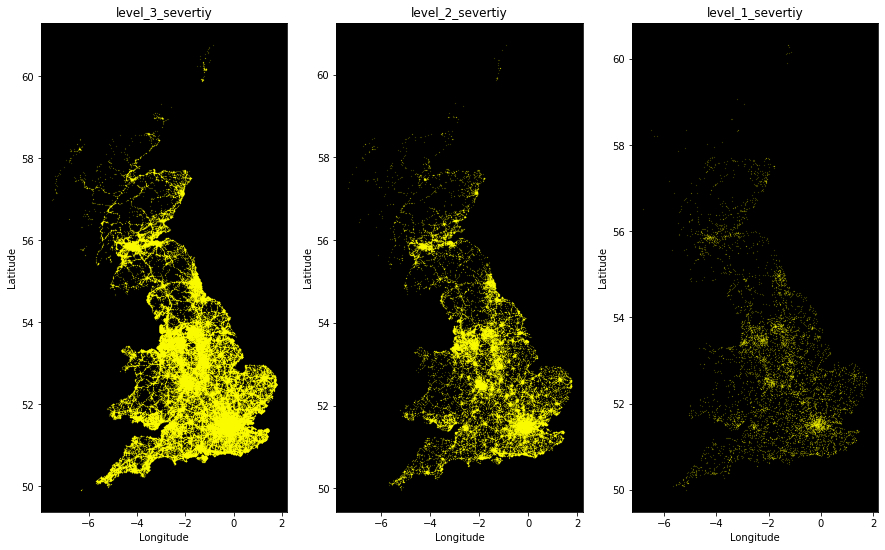

In [12]:
# plot based on created group
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,9))

## level 3 plot
level3.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax1)
ax1.set_title("level_3_severtiy")
ax1.set_facecolor('black')

## level 2 plot
level2.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax2)
ax2.set_title("level_2_severtiy")
ax2.set_facecolor('black')

# level 1 plot

level1.plot(kind='scatter', x='Longitude',y ='Latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax3)
ax3.set_title("level_1_severtiy")
ax3.set_facecolor('black')

f.show()

# 3. Accident Clustering + Data Visualization Folium

In [14]:
# Drop NA value
f_acc3 = df_acc2.dropna()
df_acc3

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
1,200501BS00002,-0.211708,51.520075,1,3,1,1,05/01/2005,4,17:36,12,E09000020,4,450,Dual carriageway,30,Automatic traffic signal,5,0,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
6,200501BS00007,-0.211277,51.512695,1,3,2,1,13/01/2005,5,20:40,12,E09000020,5,0,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
8,200501BS00010,-0.167342,51.483420,1,3,2,2,15/01/2005,7,22:43,12,E09000020,3,3212,Single carriageway,30,Automatic traffic signal,4,304,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002900,2005
9,200501BS00011,-0.206531,51.512443,1,3,2,5,15/01/2005,7,16:00,12,E09000020,4,450,Single carriageway,30,Giveway or uncontrolled,5,0,None within 50 metres,Central refuge,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002875,2005
10,200501BS00012,-0.182872,51.494902,1,3,1,1,16/01/2005,1,00:42,12,E09000020,3,4,Single carriageway,30,Automatic traffic signal,4,325,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002835,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549321,2007558W00008,-2.456511,50.614967,55,3,2,1,30/12/2007,1,16:45,646,E10000009,3,353,Single carriageway,30,Giveway or uncontrolled,3,353,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,No,E01020554,2007
549322,2007558W00024,-2.445219,50.541717,55,2,1,1,31/12/2007,2,23:25,646,E10000009,5,927,Single carriageway,40,Giveway or uncontrolled,6,0,None within 50 metres,non-junction pedestrian crossing,Darkness: Street lights present and lit,Raining with high winds,Wet/Damp,None,None,2,Yes,E01020564,2007
549323,2007558W00058,-2.328284,50.955416,55,3,2,1,19/12/2007,4,17:05,642,E10000009,5,15,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,None,None,2,Yes,E01020449,2007
549324,2007558W00135,-2.778381,50.727833,55,3,1,1,31/12/2007,2,11:14,645,E10000009,3,35,Single carriageway,60,Giveway or uncontrolled,5,91,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining with high winds,Wet/Damp,None,None,2,Yes,E01020517,2007


In [15]:
# get lat & long data of accident
geo_df = df_acc[['Latitude', 'Longitude']]
geo_df.head(5)

,Latitude,Longitude
0,51.489096,-0.191170
1,51.520075,-0.211708
2,51.525301,-0.206458
3,51.482442,-0.173862
4,51.495752,-0.156618


In [16]:
# drop NA value for geo_df
# geo_df2=geo_df.dropna(subset=['Latitude','Longitude'], axis=0 ,inplace=True)
geo_df2=geo_df.dropna()

In [25]:
# Clustering using KMeans with k = 120 based on lat-long
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=120, batch_size=1000).fit(geo_df2[['Latitude','Longitude']])
geo_df2.loc[:, ('label')] = kmeans.labels_

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [27]:
# pinpoint clutser center
map_2 = folium.Map(location=[53.659096, -0.19117],
                   zoom_start=6)
for label in kmeans.cluster_centers_:
    folium.Marker(location=[label][0]).add_to(map_2)
map_2

In [19]:
#with different style 'Stamen Terrain'
map_3 = folium.Map(location=[53.659096, -0.19117],
                   zoom_start=6, tiles ='Stamen Terrain')
for label in kmeans.cluster_centers_:
    folium.Marker(location=[label][0]).add_to(map_3)
map_3

In [20]:
#with different style 'Stamen Toner'
map_4 = folium.Map(location=[53.659096, -0.19117],
                   zoom_start=6, tiles ='Stamen Toner')
for label in kmeans.cluster_centers_:
    folium.Marker(location=[label][0]).add_to(map_4)
map_4

# 4. Spatial Data Visualization for Specific Area

In [21]:
# subset data with year and location
df_acc4 = df_acc3[(df_acc3['Year']==2007) & (df_acc3['LSOA_of_Accident_Location']=='E01004736')]
print(len(df_acc4))
df_acc4.head()

99


,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
388950,200701CW10030,-0.123896,51.506743,1,3,1,1,31/01/2007,4,16:20,1,E09000033,4,308,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01004736,2007
389010,200701CW10108,-0.128914,51.507363,1,3,3,1,11/02/2007,1,00:30,1,E09000033,3,4,Single carriageway,30,Automatic traffic signal,3,4,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Wet/Damp,None,None,1,Yes,E01004736,2007
389012,200701CW10110,-0.126214,51.502914,1,3,2,1,16/02/2007,6,08:30,1,E09000033,3,3212,Single carriageway,30,Giveway or uncontrolled,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01004736,2007
389038,200701CW10141,-0.123755,51.506651,1,3,2,1,25/02/2007,1,20:50,1,E09000033,4,308,Single carriageway,30,Giveway or uncontrolled,4,308,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004736,2007
389041,200701CW10144,-0.136128,51.503611,1,3,2,1,15/02/2007,5,15:30,1,E09000033,5,0,Single carriageway,30,Automatic traffic signal,6,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,E01004736,2007


In [22]:
#pinpoint all accident in area
#location is the mean of every lat and long point to centre the map.
location = df_acc4['Latitude'].mean(), df_acc4['Longitude'].mean()

#A basemap is then created using the location to centre on and the zoom level to start.
m = folium.Map(location=location,zoom_start=15)

#Each location in the DataFrame is then added as a marker to the basemap points are then added to the map
for i in range(0,len(df_acc4)):
    folium.Marker([df_acc4['Latitude'].iloc[i],df_acc4['Longitude'].iloc[i]]).add_to(m)
        
m

In [23]:
#subset data for heatmap
data_heat = df_acc4[['Latitude','Longitude','Number_of_Casualties']].values.tolist()

In [24]:
#accident heatmap
import folium.plugins as plugins

m = folium.Map(location=location, zoom_start=15)
#tiles='stamentoner'

plugins.HeatMap(data_heat).add_to(m)

m